In [ ]:
                                            # 2.6 Building model with deep learning#

In [ ]:
from google.colab import drive


# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Important Libraries #

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.stattools import adfuller

In [ ]:
# 1. Load dataset

store_train = pd.read_csv('/content/drive/MyDrive/storetrain.csv',)
store_train = store_train .sort_values('Date')




In [ ]:
store_train

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017208,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2,2013-01-01,0,0,0,0,a,1
679363,d,c,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",2,2013-01-01,0,0,0,0,a,1
155193,a,a,2640.0,9.0,2013.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",2,2013-01-01,0,0,0,0,a,1
632403,a,c,460.0,11.0,2012.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",2,2013-01-01,0,0,0,0,a,1
361623,a,c,23130.0,9.0,2013.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",2,2013-01-01,0,0,0,0,a,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557530,d,c,2490.0,11.0,2012.0,1,31.0,2009.0,"Jan,Apr,Jul,Oct",5,2015-07-31,8161,493,1,1,0,0
212332,a,a,5710.0,3.0,2012.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",5,2015-07-31,6756,548,1,1,0,1
982701,d,c,670.0,9.0,2013.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct",5,2015-07-31,9732,646,1,1,0,1
769288,d,a,7860.0,11.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",5,2015-07-31,5151,378,1,1,0,1


In [ ]:
print(store_train['StoreType'].unique())

['d' 'a' 'c' 'b']


In [ ]:
print(store_train['Sales'].isna().sum())
print(store_train['Date'].isna().sum())

0
0


In [ ]:
store_train['Date'] = pd.to_datetime(store_train['Date'], errors='coerce')

In [ ]:
store_train = store_train.dropna(subset=['Date'])

In [ ]:
as_df = store_train.groupby('Date')['Sales'].sum().reset_index()
as_df = as_df.set_index('Date').sort_index()
print(as_df.head())

              Sales
Date               
2013-01-01    97235
2013-01-02  6949829
2013-01-03  6347820
2013-01-04  6638954
2013-01-05  5951593


In [ ]:
as_df

,Sales
Date,
2013-01-01,97235
2013-01-02,6949829
2013-01-03,6347820
2013-01-04,6638954
2013-01-05,5951593
...,...
2015-07-27,10707292
2015-07-28,9115073
2015-07-29,8499962


In [ ]:
def create_supervised(data, lag=30):
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i - lag:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X, y = create_supervised(as_df['Sales'].values)

✅ Ready for model: X=(912, 30, 1), y=(912, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.1887
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1716
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1446
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1592
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1563
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1550
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1619
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1645
Epoch 9/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1576
Epoch 10/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1468
Epoch 11/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1566
Epoch 12/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1487
Epoch 13/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1309
Epoch 14/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1422
Epoch 15/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1186
Epoch 16/20
57/57

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


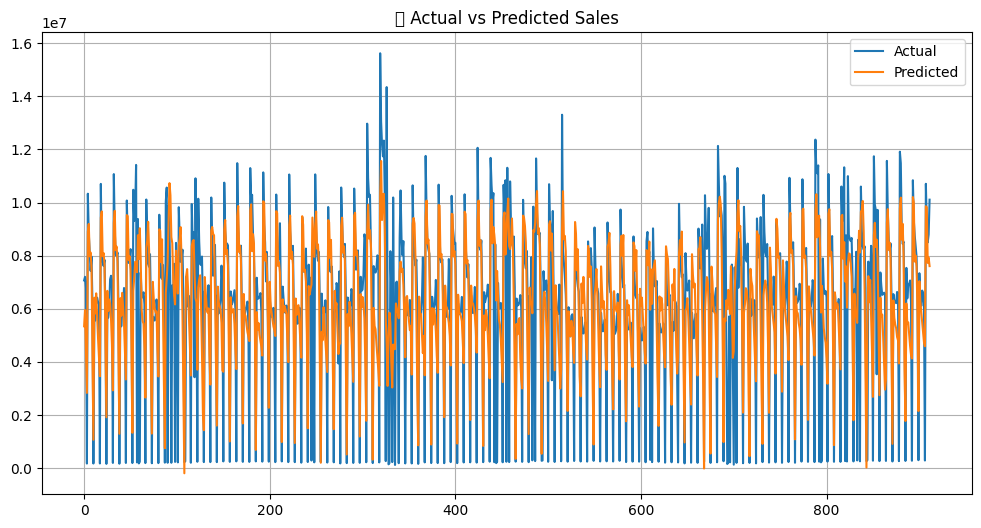

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler(feature_range=(-1, 1))
scaler_y = MinMaxScaler(feature_range=(-1, 1))

if len(X) == 0 or len(y) == 0:
    print("❌ Not enough data after sliding window. Skipping...")
else:
    # Fit and transform
    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

    # Reshape for LSTM
    X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

    print(f"✅ Ready for model: X={X_scaled.shape}, y={y_scaled.shape}")

    # Train the model
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(X_scaled.shape[1], 1)),
        LSTM(32),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_scaled, y_scaled, epochs=20, batch_size=16, verbose=1)

    #  Prediction and inverse transform #
    y_pred_scaled = model.predict(X_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)

    #  compare
    y_true = scaler_y.inverse_transform(y_scaled)

    # Plotting
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 6))
    plt.plot(y_true, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.legend()
    plt.title("📈 Actual vs Predicted Sales")
    plt.grid(True)
    plt.show()


In [ ]:

#save the model #

model.save('/content/drive/MyDrive/store_sales_lstm_model.h5')
print("✅ Model saved to Google Drive!")

✅ Model saved to Google Drive!


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/store_sales_lstm_model.h5')

In [ ]:
# prediction of sales six weeks ahead of time #

In [ ]:
# Start with the last available input sequence
last_window = X_scaled[-1]

In [ ]:
future_predictions = []

# We'll predict 42 future values (6 weeks)
current_window = last_window.copy()

for _ in range(42):
    prediction_scaled = model.predict(current_window[np.newaxis, :, :], verbose=0)
    prediction = prediction_scaled[0, 0]
    future_predictions.append(prediction)

    # Update current window with new prediction #
    current_window = np.append(current_window[1:], [[prediction]], axis=0)

In [ ]:
future_predictions = np.array(future_predictions).reshape(-1, 1)
future_sales = scaler_y.inverse_transform(future_predictions)

In [ ]:

last_date = as_df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=42)

/tmp/ipython-input-21-2512537340.py:8: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


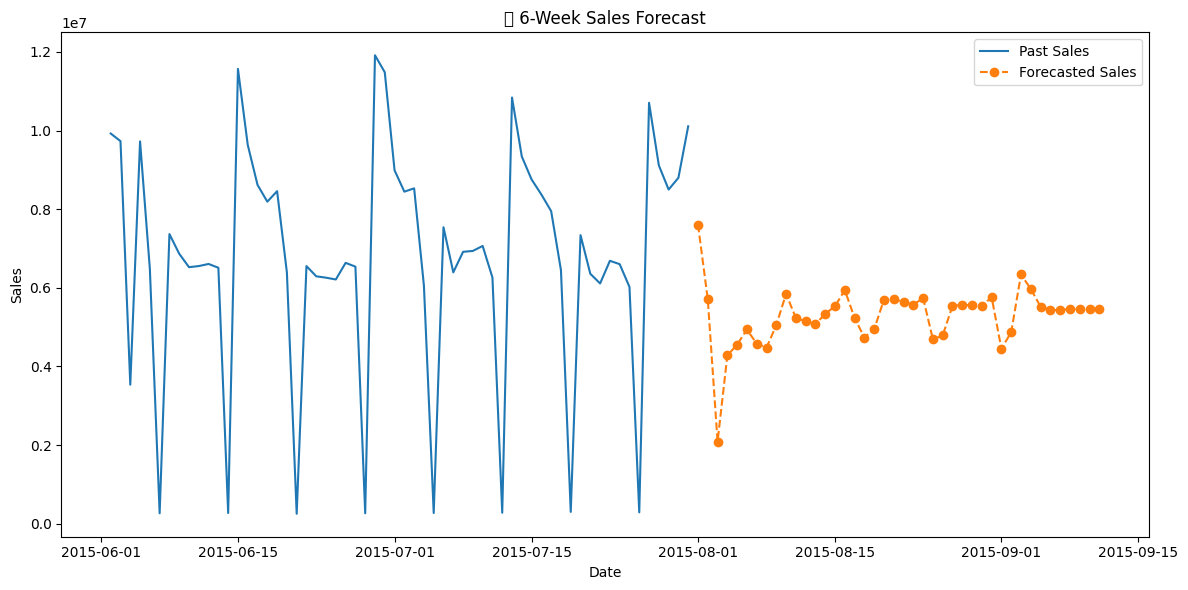

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(as_df.index[-60:], as_df['Sales'].values[-60:], label='Past Sales')
plt.plot(future_dates, future_sales, label='Forecasted Sales', linestyle='--', marker='o')
plt.title('🗓️ 6-Week Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
                                   # Building LSTM model With More Features #

In [ ]:


# Load  dataset
store_train = pd.read_csv('/content/drive/MyDrive/storetrain.csv',)
store_train = store_train .sort_values('Date')
store_train['Date'] = pd.to_datetime(store_train['Date'], errors='coerce')

# Feature engineering
store_train['DayOfWeek'] = store_train['Date'].dt.dayofweek
store_train['IsWeekend'] = store_train['DayOfWeek'].isin([5, 6]).astype(int)
store_train['IsPromo'] = store_train['Promo']
store_train['IsHoliday'] = store_train['StateHoliday'].apply(lambda x: 0 if x == '0' else 1)

# Only keep necessary columns
store_train = store_train[['Date', 'Sales', 'DayOfWeek', 'IsWeekend', 'IsPromo', 'IsHoliday']].dropna()


In [ ]:
def create_supervised_multivariate(store_train, target_col='Sales', lag=15):
    features = store_train.drop(columns=['Date', target_col]).values
    target = store_train[target_col].values

    X, y = [], []
    for i in range(len(store_train) - lag):
        X.append(features[i:i+lag])
        y.append(target[i+lag])
    return np.array(X), np.array(y)

X, y = create_supervised_multivariate(store_train, lag=30)


In [ ]:
print(store_train.dtypes)




Date         datetime64[ns]
Sales                 int64
DayOfWeek             int32
IsWeekend             int64
IsPromo               int64
IsHoliday             int64
dtype: object


In [ ]:
from tensorflow.keras.layers import GRU
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    GRU(32),
    Dense(1)
])
# Reshape for LSTM
X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X, y, epochs=10, batch_size=64, verbose=1)

# Save the model
model.save("multivariate_lstm_model.h5")


Epoch 1/10
15894/15894 ━━━━━━━━━━━━━━━━━━━━ 102s 6ms/step - loss: 46643016.0000
Epoch 2/10
 4485/15894 ━━━━━━━━━━━━━━━━━━━━ 1:10 6ms/step - loss: 42042436.0000

In [ ]:

# Save the model
model.save("multivariate_lstm_model.h5")

In [ ]:
# prediction of sales six weeks ahead of time #

In [ ]:
# Start with the last available input sequence
last_window = X_scaled[-1]

In [ ]:
future_predictions = []

# We'll predict 42 future values (6 weeks)
current_window = last_window.copy()

for _ in range(42):
    prediction_scaled = model.predict(current_window[np.newaxis, :, :], verbose=0)
    prediction = prediction_scaled[0, 0]
    future_predictions.append(prediction)

    # Update current window with new prediction #
    current_window = np.append(current_window[1:], [[prediction]], axis=0)

In [ ]:
future_predictions = np.array(future_predictions).reshape(-1, 1)
future_sales = scaler_y.inverse_transform(future_predictions)

In [ ]:
store_train['Date'] = pd.to_datetime(store_train['Date'])

In [ ]:

last_date = pd.to_datetime(store_train['Date'].iloc[-1])
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=42)

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(store_train.index[-60:], store_train['Sales'].values[-60:], label='Past Sales')
plt.plot(future_dates, future_sales, label='Forecasted Sales', linestyle='--', marker='o')
plt.title('🗓️ 6-Week Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
 # MLFlow to serve the prediction #

In [ ]:
pip install mlflow

In [ ]:
import mlflow
import mlflow.keras
import keras.models

model = keras.models.load_model("multivariate_lstm_model.h5")

with mlflow.start_run() as run:
    mlflow.keras.log_model(model, "model")
    run_id = run.info.run_id
    print("Logged model in run:", run_id)


In [ ]:
import mlflow

mlflow.get_tracking_uri()


In [ ]:
C:/Users/ACER/mlruns/0/<RUN_ID>/artifacts/model


In [ ]:
with mlflow.start_run() as run:
    ...
    print(run.info.run_id)

In [ ]:
!mlflow  models serve -m "runs:/56727d241b8741e584797165c0c9de46/model" --port 5001
